# Pre-post Analysis Notebook

This notebook will use pre-post comparison to analyze the data for three policy changes in Florida, Texas, and Washington, in order to know the the effect of these policy changes on both opioid shipments and overdose deaths (For Texas, only analyze overdose deaths).

In [3]:
#import packages
import pandas as pd
import numpy as np
import altair as alt
import statsmodels.formula.api as smf
import statsmodels as sm
from plotnine import *

Steps:
1. Normalize for size using population
2. Create a dataframe for rates before the policy
3. Create a dataframe for rates after the policy
4. Merge the two
5. Get difference between them - should decrease

- Texas - Jan 2007
- Washington - Jan 2012
- Florida - 2010

In [4]:
#import dataset
working_dir = "../20_intermediate_files/"
final = working_dir + "analysis_df.csv"
final_df = pd.read_csv(final)
final_df.head()

,county_name,state,year,fips,merge_key,drug_deaths,drug_quantity,population,death_rate,ship_rate
0,"AUTAUGA COUNTY, AL",AL,2003,1001,10012003,NaN,NaN,54571,NaN,NaN
1,"AUTAUGA COUNTY, AL",AL,2004,1001,10012004,NaN,NaN,54571,NaN,NaN
2,"AUTAUGA COUNTY, AL",AL,2005,1001,10012005,NaN,NaN,54571,NaN,NaN
3,"AUTAUGA COUNTY, AL",AL,2006,1001,10012006,NaN,20569.0,54571,NaN,37692.180829
4,"AUTAUGA COUNTY, AL",AL,2007,1001,10012007,NaN,12550.0,54571,NaN,22997.562808


In [24]:
final_df = final_df.fillna(0)
final_df.head()

,county_name,state,year,fips,merge_key,drug_deaths,drug_quantity,population,death_rate,ship_rate
0,"AUTAUGA COUNTY, AL",AL,2003,1001,10012003,0.0,0.0,54571,0.0,0.000000
1,"AUTAUGA COUNTY, AL",AL,2004,1001,10012004,0.0,0.0,54571,0.0,0.000000
2,"AUTAUGA COUNTY, AL",AL,2005,1001,10012005,0.0,0.0,54571,0.0,0.000000
3,"AUTAUGA COUNTY, AL",AL,2006,1001,10012006,0.0,20569.0,54571,0.0,37692.180829
4,"AUTAUGA COUNTY, AL",AL,2007,1001,10012007,0.0,12550.0,54571,0.0,22997.562808


## Pre-post Analysis for Florida

In [14]:
# TODO: put rate in y-axes

fl_df = final_df.loc[final_df['state'] == 'FL']
fl_df = fl_df.groupby(['year', 'county_name'], as_index = False).mean()

fl_before_df = fl_df.loc[fl_df["year"] < 2010]
fl_after_df = fl_df.loc[fl_df["year"] >= 2010]

# year, county -> one row
fl_df.head()

,year,county_name,fips,merge_key,drug_deaths,drug_quantity,population,death_rate,ship_rate
0,2003,"ALACHUA COUNTY, FL",12001.0,120012003.0,11.0,NaN,247336.0,4.447391,NaN
1,2003,"BAKER COUNTY, FL",12003.0,120032003.0,NaN,NaN,27115.0,NaN,NaN
2,2003,"BAY COUNTY, FL",12005.0,120052003.0,21.0,NaN,168852.0,12.436927,NaN
3,2003,"BRADFORD COUNTY, FL",12007.0,120072003.0,NaN,NaN,28520.0,NaN,NaN
4,2003,"BREVARD COUNTY, FL",12009.0,120092003.0,97.0,NaN,543376.0,17.851359,NaN


### Florida's Opioid Shipments Changes

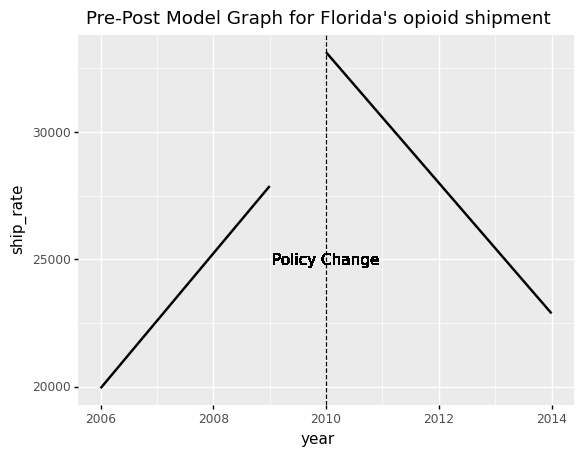

In [13]:
#plot the effect on opioid shipments during 2006-2014 (policy change in 2010)
fl_shiprate_plot = (
    ggplot(fl_df, aes(x="year", y="ship_rate"))
    + geom_smooth(
        method="lm",
        data=fl_before_df,
        se=False,
    )
    + geom_smooth(
        method="lm",
        data=fl_after_df,
        se=False,
    )
    + geom_vline(xintercept=2010, linetype="dashed")
    + geom_text(x=2010, y=25000, label="Policy Change", color="black")
    + labs(title="Pre-Post Model Graph for Florida's Opioid Shipment")
)
#fl_shiprate_plot.save("../30_results/prepost_Florida_opioid_shipment.pdf")
print(fl_shiprate_plot)

### Florida's Overdose Deaths Changes

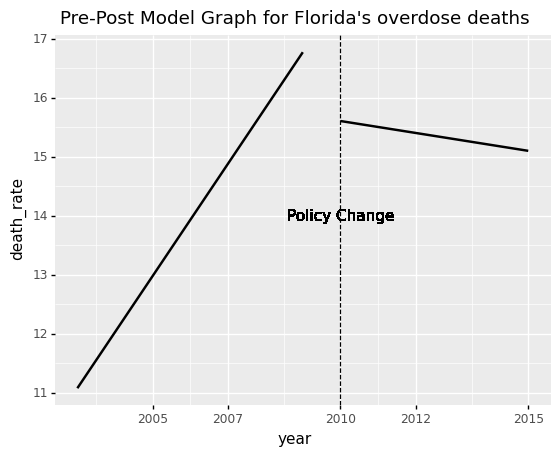

In [30]:
#plot the effect on overdose deaths during 2003-2015 (policy change in 2010)

fl_overdose_plot = (
    ggplot(fl_df, aes(x="year", y="death_rate"))
    + geom_smooth(
        method="lm",
        data=fl_before_df,
        se=False,
    )
    + geom_smooth(
        method="lm",
        data=fl_after_df,
        se=False,
    )
    + scale_x_continuous(breaks = [2002, 2005, 2007, 2010, 2012, 2015])
    + geom_vline(xintercept=2010, linetype="dashed")
    + geom_text(x=2010, y=14, label="Policy Change", color="black")
    + labs(title="Pre-Post Model Graph for Florida's overdose deaths")
)
#fl_overdose_plot.save("../30_results/prepost_Florida_overdose_deaths.pdf")
print(fl_overdose_plot)

## Pre-Post Analysis for Texas

In [16]:
#select the useful part of data for Texas
tx_df = final_df[final_df['state'] == 'TX']

In [17]:
#calculate the average drug_deaths(indicate overdose deaths)
tx_df = tx_df.groupby(['year', "county_name"], as_index = False).mean()

,year,county_name,fips,merge_key,drug_deaths,drug_quantity,population,death_rate,ship_rate
0,2003,"ANDERSON COUNTY, TX",48001.0,480012003.0,NaN,NaN,58458.0,NaN,NaN
1,2003,"ANDREWS COUNTY, TX",48003.0,480032003.0,NaN,NaN,14786.0,NaN,NaN
2,2003,"ANGELINA COUNTY, TX",48005.0,480052003.0,NaN,NaN,86771.0,NaN,NaN
3,2003,"ARANSAS COUNTY, TX",48007.0,480072003.0,NaN,NaN,23158.0,NaN,NaN
4,2003,"ARCHER COUNTY, TX",48009.0,480092003.0,NaN,NaN,9054.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3297,2015,"WOOD COUNTY, TX",48499.0,484992015.0,NaN,NaN,41964.0,NaN,NaN
3298,2015,"YOAKUM COUNTY, TX",48501.0,485012015.0,NaN,NaN,7879.0,NaN,NaN
3299,2015,"YOUNG COUNTY, TX",48503.0,485032015.0,NaN,NaN,18550.0,NaN,NaN
3300,2015,"ZAPATA COUNTY, TX",48505.0,485052015.0,NaN,NaN,14018.0,NaN,NaN


### Texas' Overdose Deaths Changes

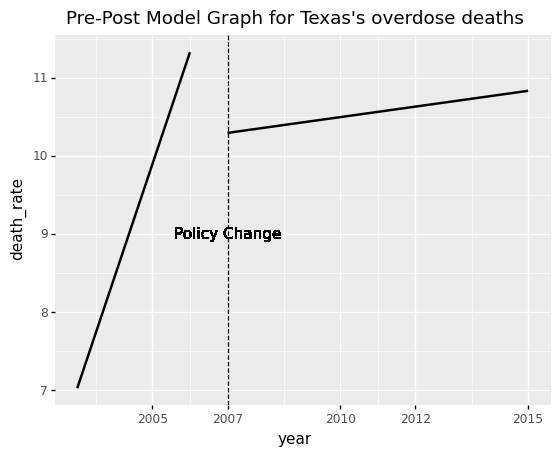

In [31]:
#plot the effect on overdose deaths during 2003-2015 (policy change in 2007)
# TODO: fix labels for x-axis
tx_overdose_plot = (
    ggplot(tx_df, aes(x="year", y="death_rate"))
    + geom_smooth(
        method="lm",
        data=tx_df[tx_df["year"] < 2007],
        se=False,
    )
    + geom_smooth(
        method="lm",
        data=tx_df[tx_df["year"] >= 2007],
        se=False,
    )
    + scale_x_continuous(breaks = [2002, 2005, 2007, 2010, 2012, 2015])
    + geom_vline(xintercept=2007, linetype="dashed")
    + geom_text(x=2007, y=9, label="Policy Change", color="black")
    + labs(title="Pre-Post Model Graph for Texas's overdose deaths")
)
#tx_overdose_plot.save("../30_results/prepost_Texas_overdose_deaths.pdf")
print(tx_overdose_plot)

## Pre-Post Analysis for Washington

In [19]:
#select the useful part of data for Washington
wa_df = final_df[final_df['state'] == 'WA']

In [20]:
#calculate the average ship_rate(indicate opioid shipments) and drug_deaths(indicate overdose deaths)
wa_df = wa_df.groupby(['year', "county_name"], as_index = False).mean()
wa_df

,year,county_name,fips,merge_key,drug_deaths,drug_quantity,population,death_rate,ship_rate
0,2003,"ADAMS COUNTY, WA",53001.0,530012003.0,NaN,NaN,18728.0,NaN,NaN
1,2003,"ASOTIN COUNTY, WA",53003.0,530032003.0,NaN,NaN,21623.0,NaN,NaN
2,2003,"BENTON COUNTY, WA",53005.0,530052003.0,10.0,NaN,175177.0,5.708512,NaN
3,2003,"CHELAN COUNTY, WA",53007.0,530072003.0,NaN,NaN,72453.0,NaN,NaN
4,2003,"CLALLAM COUNTY, WA",53009.0,530092003.0,NaN,NaN,71404.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
502,2015,"WAHKIAKUM COUNTY, WA",53069.0,530692015.0,NaN,NaN,3978.0,NaN,NaN
503,2015,"WALLA WALLA COUNTY, WA",53071.0,530712015.0,NaN,NaN,58781.0,NaN,NaN
504,2015,"WHATCOM COUNTY, WA",53073.0,530732015.0,23.0,NaN,201140.0,11.434822,NaN
505,2015,"WHITMAN COUNTY, WA",53075.0,530752015.0,NaN,NaN,44776.0,NaN,NaN


### Washington's Opioid Shipments Changes

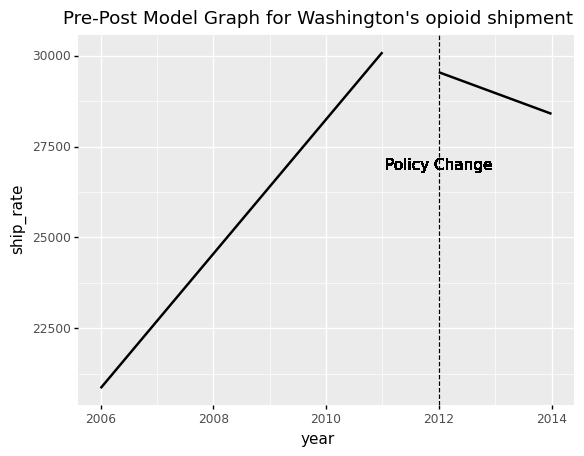

In [21]:
#plot the effect on opioid shipments during 2006-2014 (policy change in 2012)
wa_shiprate_plot = (
    ggplot(wa_df, aes(x="year", y="ship_rate"))
    + geom_smooth(
        method="lm",
        data=wa_df[wa_df["year"] < 2012],
        se=False,
    )
    + geom_smooth(
        method="lm",
        data=wa_df[wa_df["year"] >= 2012],
        se=False,
    )
    + geom_vline(xintercept=2012, linetype="dashed")
    + geom_text(x=2012, y=27000, label="Policy Change", color="black")
    + labs(title="Pre-Post Model Graph for Washington's opioid shipment")
)
#wa_shiprate_plot.save("../30_results/prepost_Washington_opioid_shipment.pdf")
print(wa_shiprate_plot)

### Washington's Overdose Deaths Changes

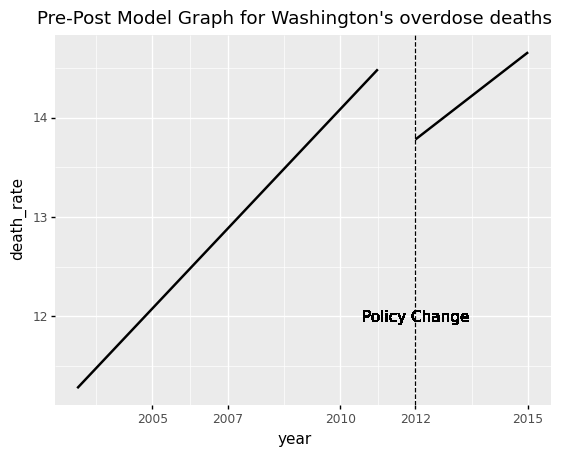

In [32]:
#plot the effect on overdose deaths during 2003-2015 (policy change in 2012)
wa_overdose_plot = (
    ggplot(wa_df, aes(x="year", y="death_rate"))
    + geom_smooth(
        method="lm",
        data=wa_df[wa_df["year"] < 2012],
        se=False,
    )
    + geom_smooth(
        method="lm",
        data=wa_df[wa_df["year"] >= 2012],
        se=False,
    )
    + scale_x_continuous(breaks = [2002, 2005, 2007, 2010, 2012, 2015])
    + geom_vline(xintercept=2012, linetype="dashed")
    + geom_text(x=2012, y=12, label="Policy Change", color="black")
    + labs(title="Pre-Post Model Graph for Washington's overdose deaths")
)
#wa_overdose_plot.save("../30_results/prepost_Washington_overdose_deaths.pdf")
print(wa_overdose_plot)